In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.common.keys import Keys


In [3]:
driver = webdriver.Chrome(executable_path=r'D:\Selenium_Beautifulsoup\chromedriver.exe')
driver.get('https://inta.tax.gov.ir/Pages/Action/LawsIndex/1')

C:\Users\gisha\AppData\Local\Temp\ipykernel_2152\918736409.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'D:\Selenium_Beautifulsoup\chromedriver.exe')



<div>
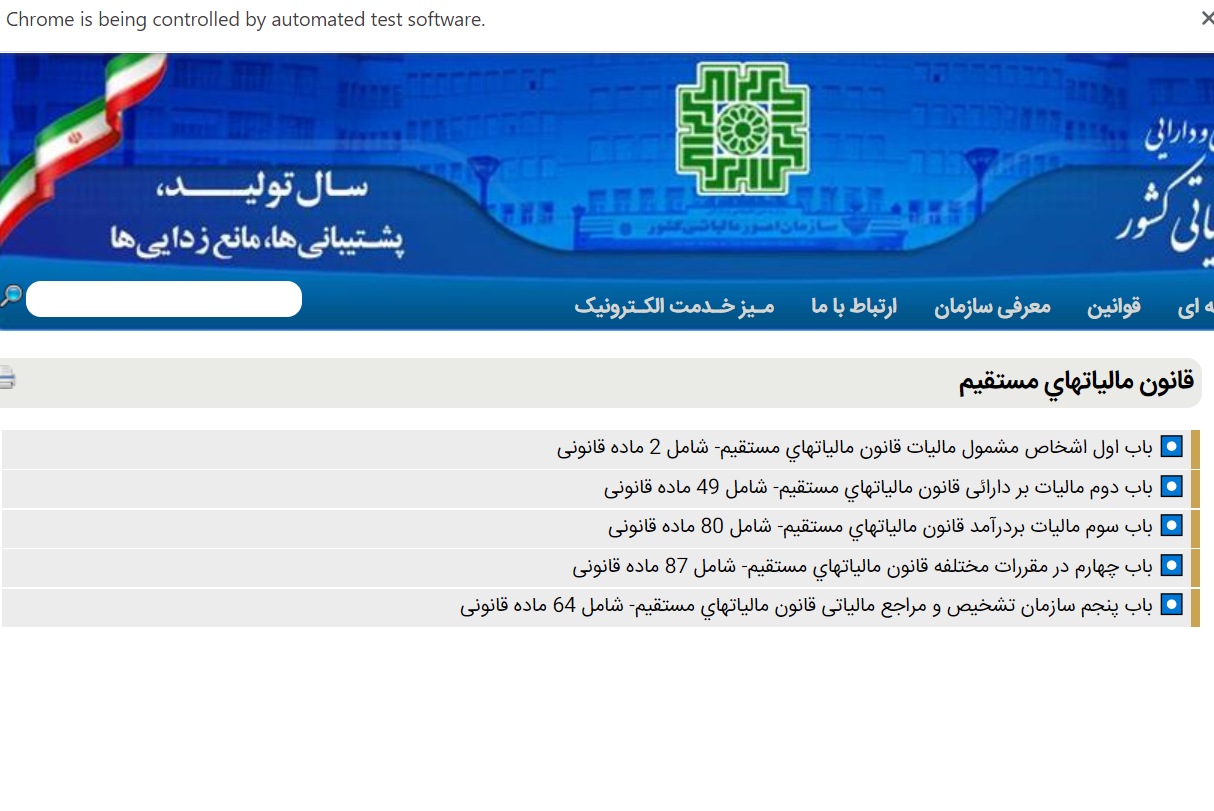
</div>

In [4]:
# select bab4
bab = driver.find_element(By.CSS_SELECTOR,'#LabelMainContent > table:nth-child(4) > tbody > tr > td:nth-child(2) > a')
#to get the next page >>> Fasl ha
bab.send_keys(Keys.ENTER) 


<div>
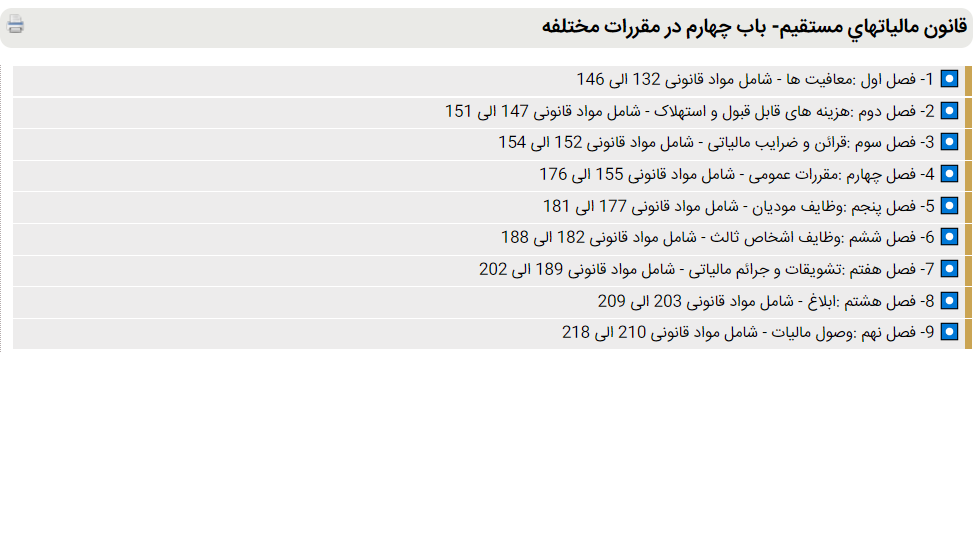
</div>

In [4]:
fasl_ha = driver.find_elements(By.CSS_SELECTOR,'#LabelMainContent > table > tbody > tr > td:nth-child(2) > a') 
shomare_fasl_ha = [i for i in range(1,(len(fasl_ha)+1))]

 # get data from one part  >>> sample : 4-2

In [5]:
fasl_ha[1].click() #to get the next page >>> Madde ha

<div>
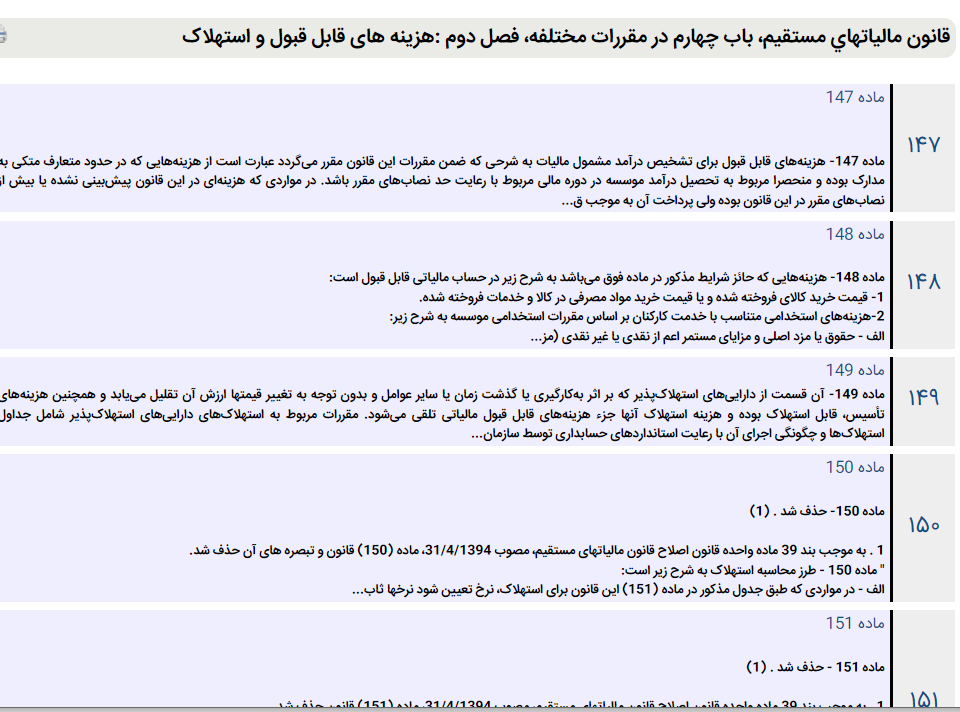
</div>

In [7]:
madde_ha = driver.find_elements(By.CSS_SELECTOR,'#LabelMainContent > table > tbody')
link_madde_ha = [tag.find_element(By.CSS_SELECTOR,'#LabelMainContent > table > tbody > tr> td > a') for tag in madde_ha]
shomare_madde_ha = [tag.find_element(By.CSS_SELECTOR,'#LabelMainContent > table > tbody > tr> td > a').get_attribute("text") for tag in madde_ha]

# get data from one article >>> sample : 4-2-147

In [8]:
link_madde_ha[0].click()  # madde 147 az fasl 2 bab 4

In [9]:
matn_madde = driver.find_elements(By.CSS_SELECTOR,'#LabelMainContent > p')
matn_madde = [matn.get_attribute("textContent") for matn in matn_madde]
matn_madde = ''.join(matn_madde)
print(matn_madde)

 ‌ماده 147- هزینه‌های قابل قبول برای تشخیص درآمد مشمول مالیات به شرحی که ضمن مقررات این قانون مقرر می‌گردد عبارت است از‌ هزینه‌هایی که در حدود متعارف متکی به مدارک بوده و منحصرا مربوط به تحصیل درآمد موسسه در دوره مالی مربوط با رعایت حد نصاب‌های مقرر ‌باشد. در مواردی که هزینه‌ای در این قانون پیش‌بینی نشده یا بیش از نصاب‌های مقرر در این قانون بوده ولی پرداخت آن به موجب قانون و یا مصوبه ‌هیأت وزیران صورت گرفته باشد قابل قبول خواهد بود.تبصره1ـ از لحاظ مقررات این فصل، کلیه اشخاص حقوقی و همچنین صاحبان مشاغل موضوع ماده(95) این قانون که مکلف به نگهداری دفاتر می‌باشند، در حکم موسسه محسوب می‌شوند. همچنین هزینه‌های قابل قبول مالیاتی در مورد سایر صاحبان مشاغل نیز قابل پذیرش است.تبصره2ـ هزینه‌های مربوط به درآمدهایی که به موجب این قانون از پرداخت مالیات معاف یا مشمول مالیات با نرخ صفر بوده یا با نرخ مقطوع محاسبه می‌شود، به‌عنوان هزینه‌های قابل قبول مالیاتی شناخته نمی‌شوند.تبصره3ـ پذیرش هزینه­های پرداختی قابل قبول مالیاتی موضوع این قانون که به شیوه تهاتری انجام نشود از مبلغ پنجاه میلیون (50,000,000) 

In [10]:
# peyvast ha (ebkaghiye ha) har madde
noe_eblaghiye = driver.find_elements(By.CLASS_NAME,'itemtitle')
noe_eblaghiye_text = [title.get_attribute("textContent") for title in noe_eblaghiye] 
print(noe_eblaghiye_text)

['ایین نامه ها', 'بخشنامه ها', 'تصویب نامه ها و تصمیم نامه ها', 'دستورالعمل ها', 'دیوان عدالت اداری', 'رای شوراها', 'سایر اطلاعات']



<div>
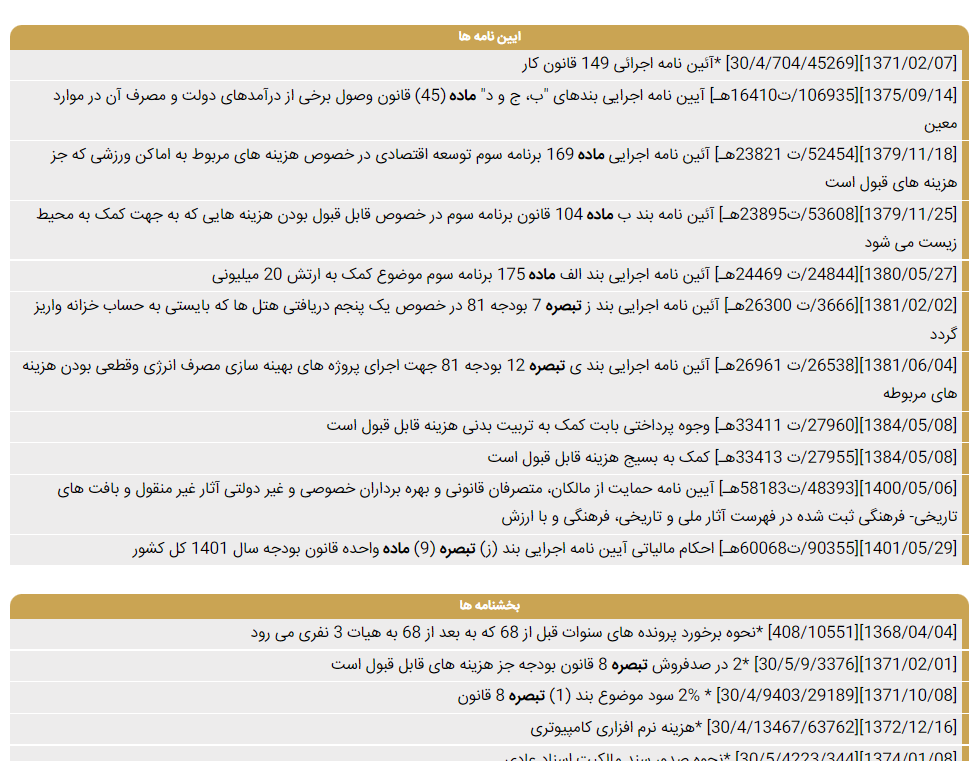
</div>

# getting the links and title of each announcement 

In [19]:
title_and_link_eblaghiye = dict.fromkeys(noe_eblaghiye_text)
for i in range(len(noe_eblaghiye_text)):
    key=noe_eblaghiye_text[i]
    if i==len(noe_eblaghiye_text)-1:
        title_and_link_eblaghiye[key] = driver.find_elements(By.XPATH,f'//*[@id="LabelMainContent"]/table[./preceding-sibling::div/a/b[text()="{noe_eblaghiye_text[i]}"]]/tbody/tr/td[2]/a')
    else:
        title_and_link_eblaghiye[key] = driver.find_elements(By.XPATH,f'//*[@id="LabelMainContent"]/table[./preceding-sibling::div/a/b[text()="{noe_eblaghiye_text[i]}"]][./following-sibling::div/a/b[text()="{noe_eblaghiye_text[i+1]}"]]/tbody/tr/td[2]/a')
    
    
title = ' '.join(title_and_link_eblaghiye['ایین نامه ها'][0].get_attribute("text").split(' ')[1:])
print("موضوع : " + title)
date = title_and_link_eblaghiye['ایین نامه ها'][0].get_attribute("text").split(' ')[0][1:11]
print("تاریخ : " + date)
end = len(title_and_link_eblaghiye['ایین نامه ها'][0].get_attribute("text").split(' ')[0])
number = title_and_link_eblaghiye['ایین نامه ها'][0].get_attribute("text").split(' ')[0][13:end-1]
print("شماره : " + number)

موضوع : *آئین نامه اجرائی 149 قانون کار
تاریخ : 1371/02/07
شماره : 30/4/704/45269
